## Geospatial data models

Resources:

* [
GRASS GIS overview and manual](http://grass.osgeo.org/grass74/manuals/index.html)
*  [Recommendations](data_acquisition.html#commands)
and [tutorial](./grass_intro.html)
how to use GUI from the first assignment


### Start GRASS GIS
Start GRASS - click on GRASS icon or type

In [1]:
# This is a quick introduction into Jupyter Notebook.
# Python code can be executed like this:
a = 6
b = 7
c = a * b
print "Answer is", c
# Python code can be mixed with command line code (Bash).
# It is enough just to prefix the command line with an exclamation mark:
!echo "Answer is $c"
# Use Shift+Enter to execute this cell. The result is below.

Answer is 42
Answer is 42


In [2]:
import os
import sys
import subprocess
from IPython.display import Image

# create GRASS GIS runtime environment
gisbase = subprocess.check_output(["grass", "--config", "path"]).strip()
os.environ['GISBASE'] = gisbase
sys.path.append(os.path.join(gisbase, "etc", "python"))

# do GRASS GIS imports
import grass.script as gs
import grass.script.setup as gsetup

# set GRASS GIS session data
rcfile = gsetup.init(gisbase, "/home/jovyan/grassdata", "nc_spm_08_grass7", "user1")

In [3]:
# default font displays
os.environ['GRASS_FONT'] = 'sans'
# overwrite existing maps
os.environ['GRASS_OVERWRITE'] = '1'
gs.set_raise_on_error(True)
gs.set_capture_stderr(True)

True

In [4]:
# set display modules to render into a file (named map.png by default)
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'
os.environ['GRASS_RENDER_FILE_READ'] = 'TRUE'
os.environ['GRASS_LEGEND_FILE'] = 'legend.txt'

In startup pannel set GIS Data Directory to path to datasets,
for example on MS Windows, `C:\Users\myname\grassdata`.
For Project location select nc_spm_08_grass7 (North Carolina, State Plane, meters) and
for Accessible mapset create a new mapset (called e.g. HW_data_models).
Click Start GRASS.

If you prefer to work in GUI, you should be able to find out yourself
the GUI equivalents for the tasks below.
Some hints for GUI are included, but
from now on, most of the instructions will be provided as commands for command line.
Hint for running most of the commands in GUI - type or paste the name of the module
into the command console in the _Console_ tab and then hit Enter to open the GUI dialog.
_Read_ the manual page for each command you are using for the first time to learn
what it is doing and what the parameters mean.

### Resampling to higher resolution


Resample the given raster map to higher and lower resolution
(30m->10m, 30m->100m) and compare resampling by nearest neighbor
with bilinear and bicubic method.
First, set the computation region extent to our study area
and set resolution to 30 meters.
The computational region (region for short) is set using
_g.region_ module.
Here for convenience we use named region which defines both the extent and the resolution.
This named region is included in the data (location) we are using
but it is possible to create new named regions and use them to bookmark different study areas.

In [5]:
gs.parse_command('g.region', region="swwake_30m", flags='pg')

{u'cells': u'225000',
 u'cols': u'500',
 u'e': u'645000',
 u'ewres': u'30',
 u'n': u'228500',
 u'nsres': u'30',
 u'projection': u'99',
 u'rows': u'450',
 u's': u'215000',
 u'w': u'630000',
 u'zone': u'0'}

The `-p` flag for _g.region_ is used to print the region
we just set.


Then we display the 30m resolution NED elevation raster.

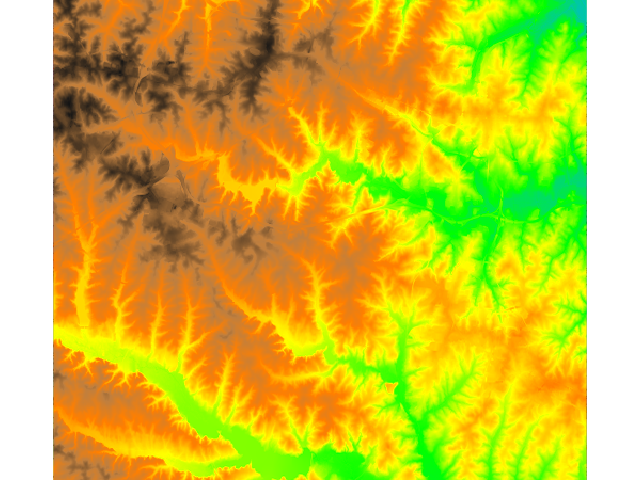

In [6]:
gs.run_command('d.rast', map="elev_ned_30m")
Image(filename="map.png")

To resample it to 10m resolution, first set the computational region to resolution 10m,
then resample the raster using the nearest neighbor method.
Hint: To open the _r.resamp.interp_ in GUI, type or paste the module name
into the _Console_ tab, then _Enter_ to open the GUI dialog,
don't forget to set the method to nearest under _Optional_ tab.

In [7]:
gs.parse_command('g.region', res="10", flags='pg')
gs.run_command('r.resamp.interp', input="elev_ned_30m", out="elev_ned10m_nn", method="nearest")

0

Display the resampled map by adding "elev_ned10m_nn" to _Layer Manager_
in case you don't have it in the Layer Manager already.
Alternatively, use in command line the following:

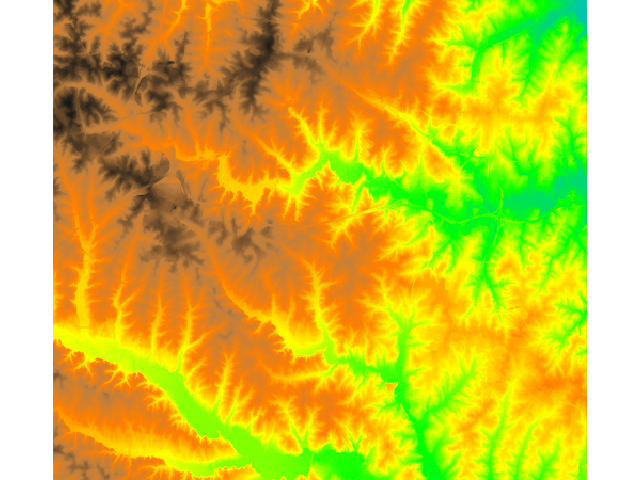

In [8]:
gs.run_command('d.rast', map="elev_ned10m_nn")
Image(filename="map.png")

The elevation map "elev_ned10m_nn" looks the same as the original one,
so now check the resampled elevation surface using the aspect map:

In [9]:
gs.run_command('r.slope.aspect', elevation="elev_ned10m_nn", aspect="aspect_ned10m_nn")

0

Display the resampled map by adding "aspect_ned10m_nn" to _Layer Manager_
or in command line using:

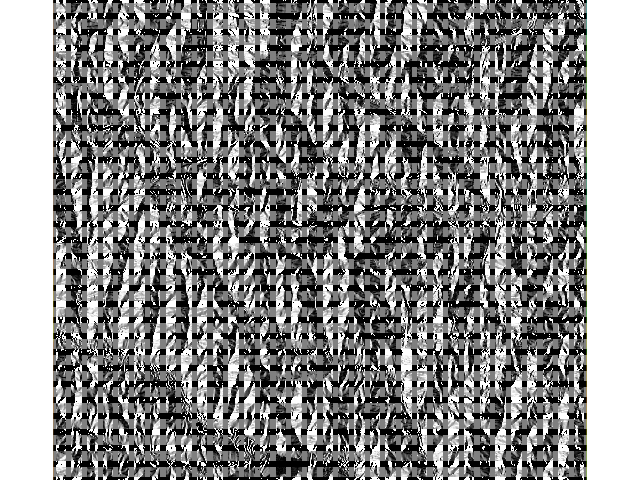

In [10]:
gs.run_command('d.rast', map="aspect_ned10m_nn")
Image(filename="map.png")

To save the map, click in _Map Display_ to on the button
_Save display to graphic file"_ or alternatively,
use the following command:

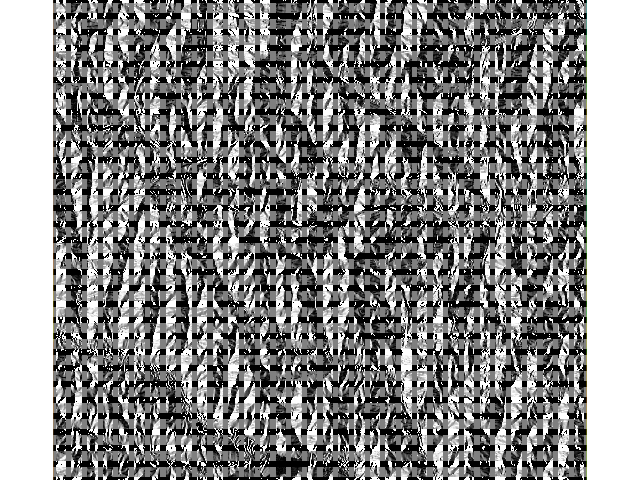

In [11]:
Image(filename="map.png")

Now, reinterpolate DEMs using bilinear and bicubic interpolation.
Check the interpolated elevation surfaces using aspect maps.

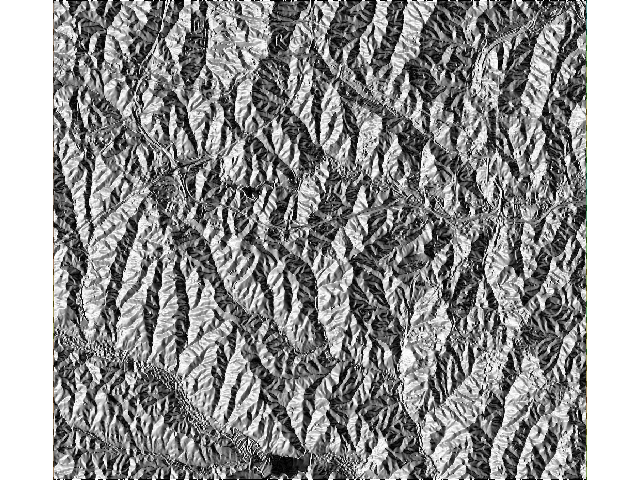

In [12]:
gs.run_command('r.resamp.interp', input="elev_ned_30m", out="elev_ned10m_bil", meth="bilinear")
gs.run_command('r.resamp.interp', input="elev_ned_30m", out="elev_ned10m_bic", meth="bicubic")
gs.run_command('r.slope.aspect', elevation="elev_ned10m_bil", aspect="aspect_ned10m_bil")
gs.run_command('r.slope.aspect', elevation="elev_ned10m_bic", aspect="aspect_ned10m_bic")
gs.run_command('d.rast', map="aspect_ned10m_bil")
gs.run_command('d.rast', map="aspect_ned10m_bic")
Image(filename="map.png")

Save the displayed maps and in your report, compare the results with
the previously computed nearest neighbor result.
In _Map Display_ click button _Save display to graphic file_,
or use the following in the command line:

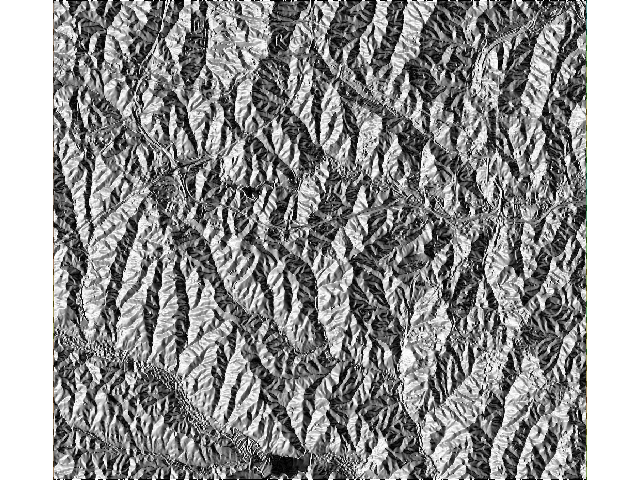

In [13]:
Image(filename="map.png")

Why is the aspect of elevation raster map computed by the nearest neighbor method different from the one computed by bilinear interpolation?

### Resampling to lower resolution


Resample to lower resolution (30m -> 100m).

First, display the original elevation and land use maps:

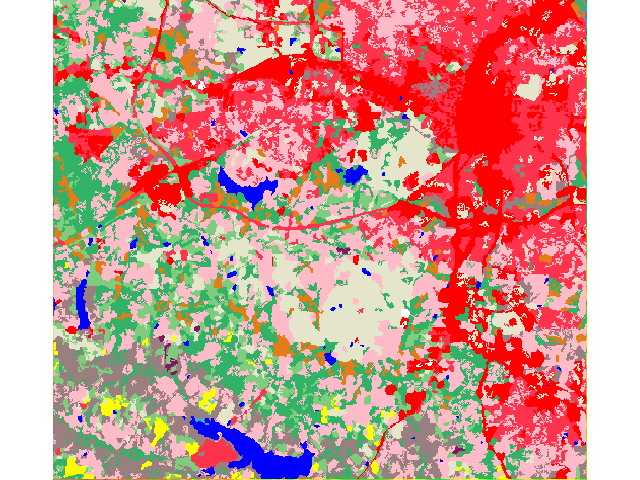

In [14]:
gs.run_command('d.rast', map="elev_ned_30m")
gs.run_command('d.rast', map="landuse96_28m")
Image(filename="map.png")

Then change the region resolution and resample
elevation (which is a continuous field)
and land use (which has discrete categories).
Explain selection of aggregation method. Can we use average also for landuse?
What does mode mean?

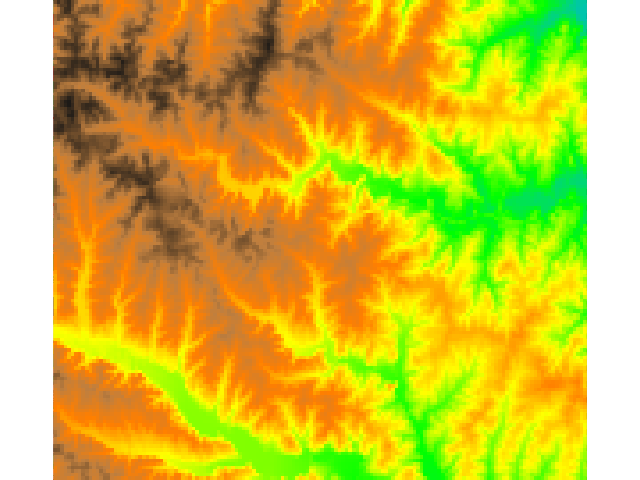

In [15]:
gs.parse_command('g.region', res="100", flags='pg')
gs.run_command('r.resamp.stats', input="elev_ned_30m", out="elev_new100m_avg", method="average")
gs.run_command('d.rast', map="elev_new100m_avg")
Image(filename="map.png")

Before the next computation, remove all map layers from the _Layer Manager_
because we don't need to see them anymore.

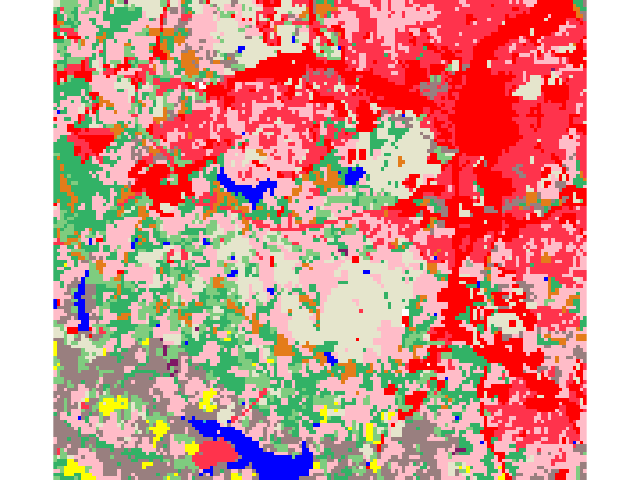

In [16]:
gs.run_command('d.erase')
gs.run_command('r.resamp.stats', input="landuse96_28m", out="landuse96_100m", method="mode")
gs.run_command('d.rast', map="landuse96_100m")
Image(filename="map.png")

Remove or switch off the land use, elevation and aspect maps.



### Converting between vector data types


Convert census blocks polygons to points using their centroids
(useful for interpolating a population density trend surface):

In [17]:
gs.run_command('v.to.points', input="census_wake2000", type="centroid", out="census_centr", use="vertex")

0

Display census boundaries using GUI:
_Add vector_ "census_wake2000"
_Selection_ > _Feature type_ > _boundary_
(switch off the other types).
Save the displayed map in _Map Display_ click button
_Save display to graphic file_.
Alternatively, use the following commands to control display.

Note that in both command line and GUI you must either enter the full path
to the file you are saving the image in, or you must know the current working
directory.

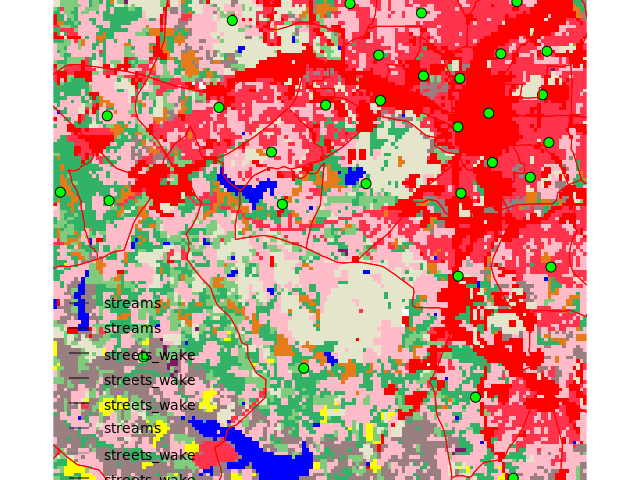

In [18]:
gs.run_command('d.vect', map="census_centr", icon="basic/circle", fill_color="green", size="10")
gs.run_command('d.vect', map="census_wake2000", color="red", fill_color="none")
gs.run_command('d.legend.vect')
Image(filename="map.png")

Convert contour lines to points (useful for computing DEM from contours):

In [19]:
gs.run_command('v.to.points', input="elev_ned10m_cont10m", output="elev_ned_contpts", type="line", use="vertex")

0

Display the "elev_ned_contpts" points vector and zoom-in to very small area
to see the actual points.

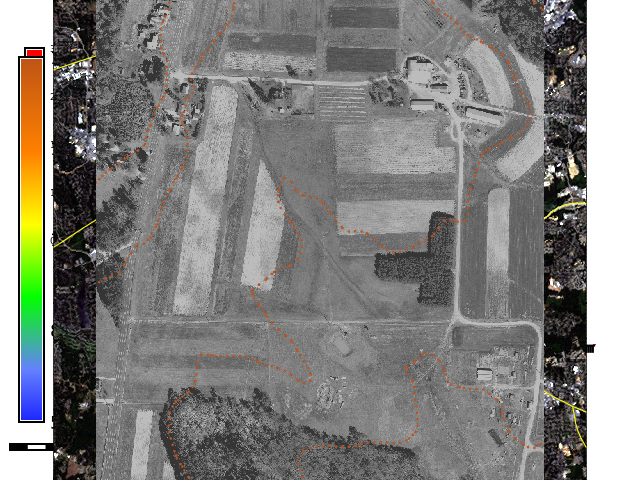

In [20]:
gs.run_command('d.vect', map="elev_ned_contpts", co="brown", icon="basic/point", size="3")
Image(filename="map.png")

### Convert from vector to raster


Convert vector data to raster for use in raster-based analysis.
First, adjust the computational region to resolution 200m:

In [21]:
gs.parse_command('g.region', region="swwake_30m", res="200", flags='pg')

{u'cells': u'5100',
 u'cols': u'75',
 u'e': u'645000',
 u'ewres': u'200',
 u'n': u'228500',
 u'nsres': u'198.52941176',
 u'projection': u'99',
 u'rows': u'68',
 u's': u'215000',
 u'w': u'630000',
 u'zone': u'0'}

Then remove all layers from the _Layer Manager_.



Convert vector points "schools" to raster.
As value for raster use attribute column "CORECAPACI" for core capacity.
To add legend in GUI use
_Add map elements_ > _Show/hide legend_
and select "schools_cap_200m".

INTEGER|cat
CHARACTER|TAG
CHARACTER|NAMESHORT
CHARACTER|NAMELONG
DOUBLE PRECISION|CORECAPACI
DOUBLE PRECISION|MOBILEUNIT
DOUBLE PRECISION|MOBILECAPA
CHARACTER|GLEVEL
CHARACTER|LOGRADE
CHARACTER|HIGRADE
CHARACTER|CALENDAR
CHARACTER|HASBASE
CHARACTER|ISMAGNET
CHARACTER|PHONE
CHARACTER|ADDRNUMBER
CHARACTER|ADDRPREFIX
CHARACTER|ADDRROOT
CHARACTER|ADDRTYPE
CHARACTER|ADDRSUFFIX
CHARACTER|ADDRCITY
CHARACTER|ADDRZIPCOD
DOUBLE PRECISION|SPED
CHARACTER|STATUS
CHARACTER|NODEID
DOUBLE PRECISION|CAPACITYTO
CHARACTER|ESL
CHARACTER|BOARDDIS2
DOUBLE PRECISION|PROJ_CAP
CHARACTER|NOTES



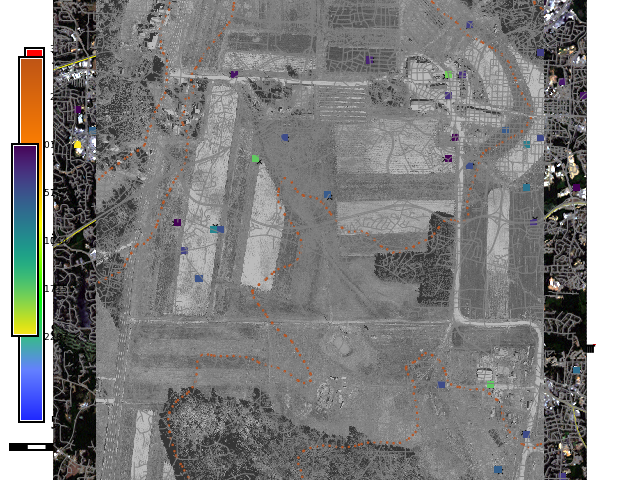

In [22]:
gs.run_command('d.vect', map="schools_wake")
print gs.read_command('v.info', map="schools_wake", flags='c')
gs.run_command('v.to.rast', input="schools_wake", out="schools_cap_200m", use="attr", attrcol="CORECAPACI", type="point")
gs.run_command('d.rast', map="schools_cap_200m")
gs.run_command('d.vect', map="streets_wake", co="grey")
gs.run_command('d.legend', raster="schools_cap_200m", at="70,30,2,6")
Image(filename="map.png")

Now convert lines in "streets" vector to raster.
Set the resolution to 30m and use speed limit attribute.

In [23]:
gs.parse_command('g.region', res="30", flags='pg')
gs.run_command('v.to.rast', input="streets_wake", out="streets_speed_30m", use="attr", attrcol="SPEED", type="line")

0

If you haven't done this already, add remove all other map layers
from _Layer Manager_ and add "streets_speed_30m" raster layer.
Add legend for "streets_speed_30m" raster using GUI in _Map Display_:
_Add legend_ > _Set Options_ > _Advanced_ > _List of discrete cat numbers_
and type in speed limits 25,35,45,55,65; move legend with mouse as needed.

Alternatively, use the following commands:

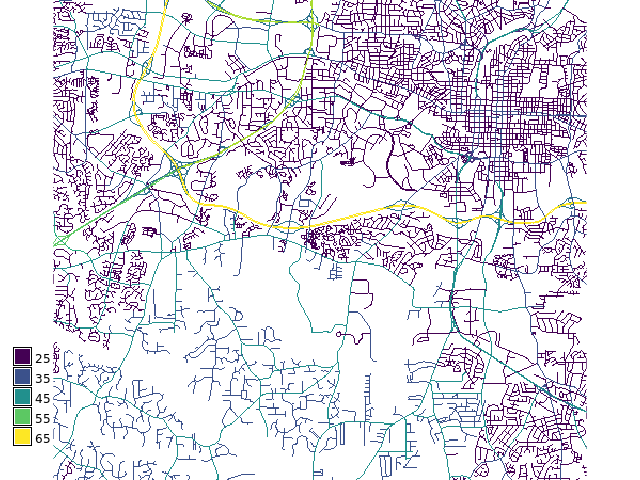

In [24]:
gs.run_command('d.erase')
gs.run_command('d.rast', map="streets_speed_30m")
gs.run_command('d.legend', raster="streets_speed_30m", at="5,30,2,5", use="25,35,45,55,65")
Image(filename="map.png")

Save the displayed map.
In _Map Display_ click button _Save display to graphic file_,
or use the following.

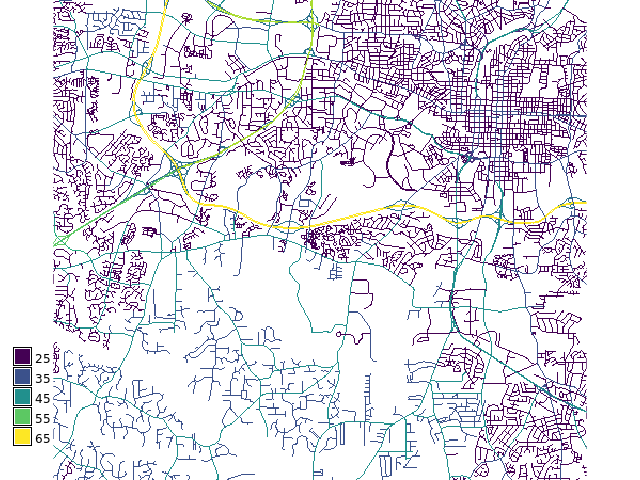

In [25]:
Image(filename="map.png")

### Convert from raster to vector

Convert raster lines to vector lines.

First, set the region and remove map layers from _Layer Manager_.
Then do the conversion.

Explain why we are using _r.thin_ module.
You may want to remove all previously used layers from the _Layer Manager_
before you start these new computations.

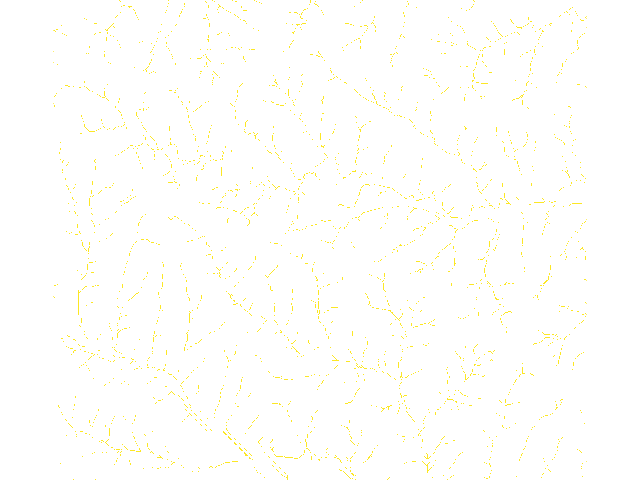

In [26]:
gs.run_command('d.erase')
gs.parse_command('g.region', raster="streams_derived", flags='pg')
gs.run_command('d.rast', map="streams_derived")
gs.run_command('r.thin', input="streams_derived", output="streams_derived_t")
gs.run_command('r.to.vect', input="streams_derived_t", output="streams_derived_t", type="line")
Image(filename="map.png")

Visually compare the result with streams digitized from airphotos.

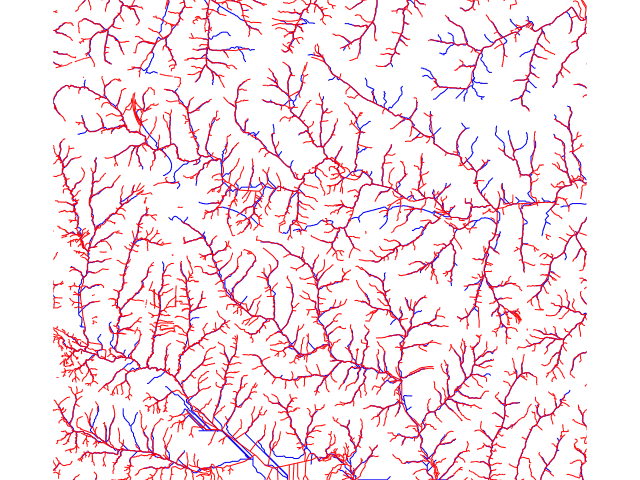

In [27]:
gs.run_command('d.vect', map="streams_derived_t", color="blue")
gs.run_command('d.vect', map="streams", color="red")
Image(filename="map.png")

Save the displayed map (in Map Display click button _Save display to graphic file_).

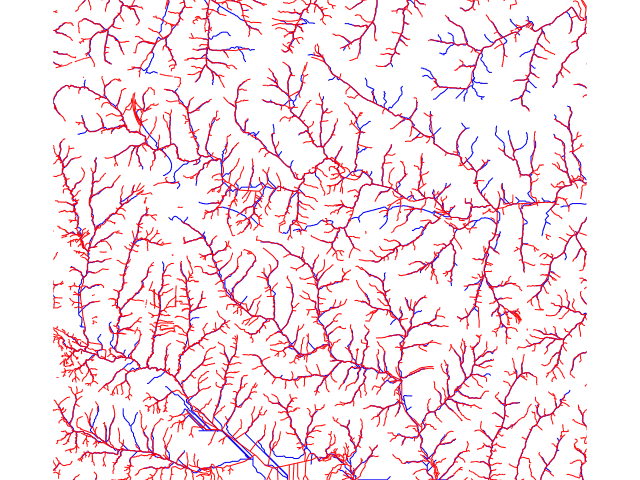

In [28]:
Image(filename="map.png")

Convert raster areas representing basins to vector polygons.

Use raster value as category number (flag -v) and 
display vector polygons filled with random colors.
In GUI: Add vector > Colors > Switch on Random colors.
You may want to remove all previously used layers from the _Layer Manager_
before you start these new computations.

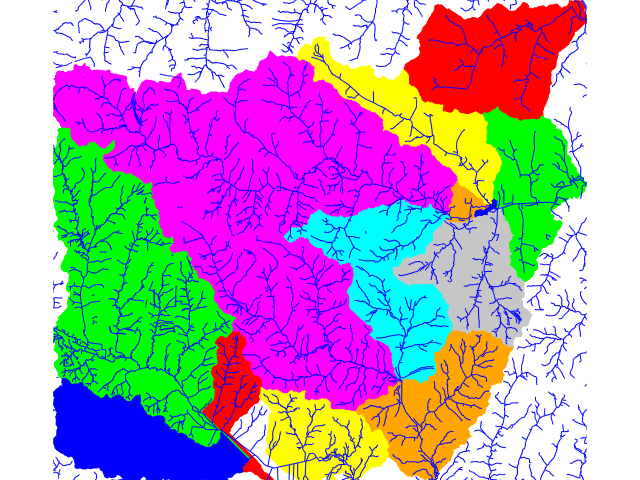

In [29]:
gs.parse_command('g.region', raster="basin_50K", flags='pg')
gs.run_command('d.erase')
gs.run_command('d.rast', map="basin_50K")
gs.run_command('r.to.vect', input="basin_50K", output="basin_50Kval", type="area", flags='sv')
gs.run_command('d.vect', map="basin_50Kval", flags='c')
gs.run_command('d.vect', map="streams", color="blue")
Image(filename="map.png")

Save the displayed map either using GUI or using the following in case
you are working in the command line.

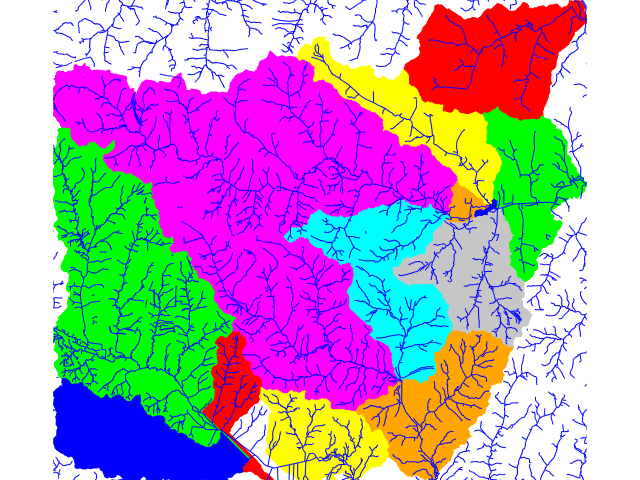

In [30]:
Image(filename="map.png")

In [31]:
# end the GRASS session
os.remove(rcfile)